In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

We will use only 'Age','Fare','Survived' columns for our test.

In [7]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.shape

(891, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [10]:
#check missing values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [15]:
#fill the missing values in Age column
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [16]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [20]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [23]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


Check the distribution of input features.

C:\Users\Subrat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


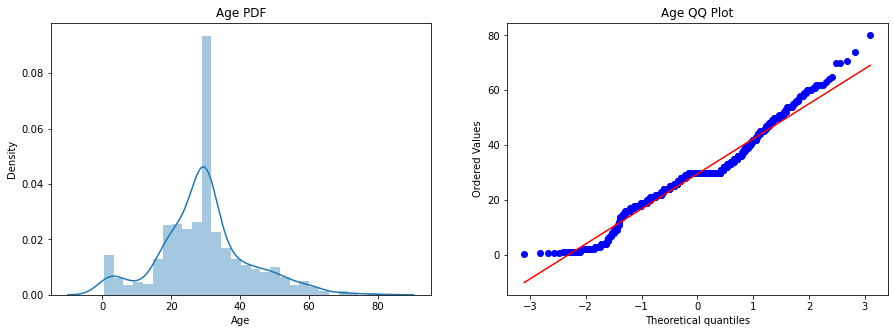

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Subrat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


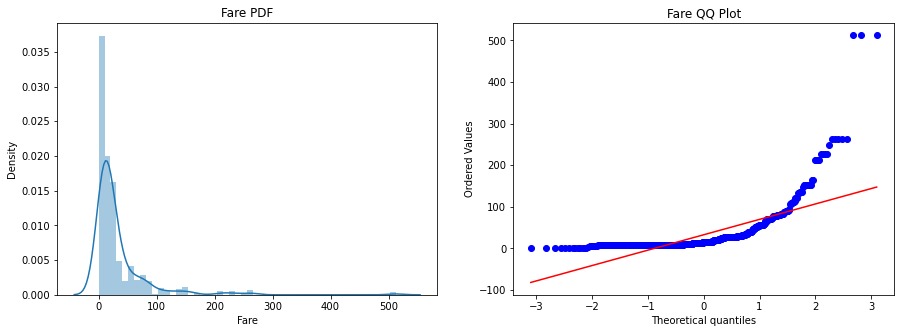

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [37]:
model_log1 = LogisticRegression()
model_dt1 = DecisionTreeClassifier()

In [53]:
model_log1.fit(X_train,y_train)
model_dt1.fit(X_train,y_train)

y_pred1 = model_log1.predict(X_test)
y_pred2 = model_dt1.predict(X_test)

print('Accuracy score of Logistic :', accuracy_score(y_test,y_pred1))
print("Accuracy score of DT : ",accuracy_score(y_test,y_pred2))

Accuracy score of Logistic : 0.6480446927374302
Accuracy score of DT :  0.6536312849162011


We will use Function Transformer only on Fare column as the data is right skewed.

In [54]:
trns = ColumnTransformer([
    ('log_trns',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough') #It will apply transform only on Fare column and will pass the the rest columns

In [55]:
X_train_trans = trns.fit_transform(X_train)
X_test_trans = trns.transform(X_test)

In [62]:
model_log2 = LogisticRegression()
model_dt2  = DecisionTreeClassifier()

model_log2.fit(X_train_trans,y_train)
model_dt2.fit(X_train_trans,y_train)

y_pred3 = model_log2.predict(X_test_trans)
y_pred4 = model_dt2.predict(X_test_trans)

print('Accuracy score of Logistic :', accuracy_score(y_test,y_pred3))
print("Accuracy score of DT : ", accuracy_score(y_test,y_pred4))

Accuracy score of Logistic : 0.6703910614525139
Accuracy score of DT :  0.6536312849162011


Text(0.5, 1.0, 'Fare After Transform')

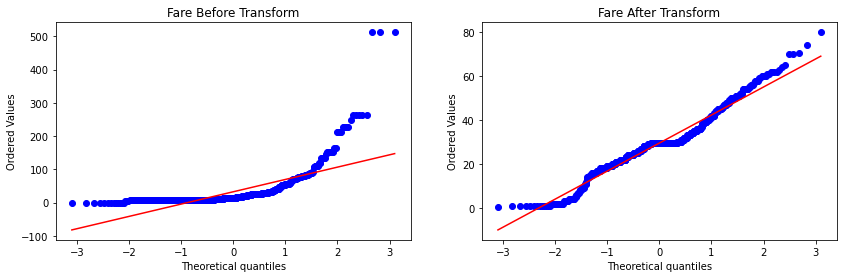

In [71]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Transform')

plt.subplot(122)
stats.probplot(X_train_trans[:,1], dist="norm", plot=plt)
plt.title('Fare After Transform')


In [57]:
# Cross validation score
X_trans = trns.fit_transform(X)

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

In [61]:
print('LR :',np.mean(cross_val_score(model1, X_trans, y, scoring='accuracy', cv=10)))
print('DT :',np.mean(cross_val_score(model2, X_trans, y, scoring='accuracy', cv=10)))

LR : 0.6712609238451936
DT : 0.6622222222222222
